In [215]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [216]:
df_received = pd.read_csv("data/df_received_all.csv")
df_received["Received"] = pd.to_datetime(df_received["Received"])
df_accepted = pd.read_csv("data/df_accepted_all.csv")
df_accepted["Accepted"] = pd.to_datetime(df_accepted["Accepted"])

In [217]:
df_received["year"] = df_received["Received"].dt.year
df_received["month"] = df_received["Received"].dt.month
df_received["day"] = df_received["Received"].dt.day

In [218]:
df_received_count = pd.DataFrame(df_received.groupby(["month", "year", "day"])["month"].count())

In [219]:
# df_received_month = df_received.groupby([df_received["Received"].dt.month, df_received["Received"].dt.year]).count()
# print(df_received_month.shape)
# df_received_month.head()

In [220]:
# # change multiindex and column names
df_received_count = df_received_count.rename(columns={'month': 'count'})
df_received_count.index = df_received_count.index.set_names(['index_month', 'year', 'day'])
df_received_count.head()

count
index_month year day       
1           2021 5        1
                 13       1
                 26       1
                 27       2
            2022 1        2

In [221]:
# df_received_month.head()

In [222]:
# df_received_month.groupby('year').mean()

In [223]:
# df_received['Count'] = df_received.groupby(['Received'])['ID'].transform('count')

In [224]:
# df_received_day = df_received.groupby([df_received["Received"].dt.month, df_received["Received"].dt.day]).count()
# print(df_received_day.shape)
# df_received_day.head(5)

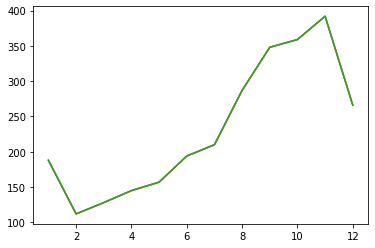

In [225]:
plt.plot(df_received.groupby(["month"]).count())

In [226]:
# turn multi index to columns
df_received_long = df_received_count.index.to_frame(name=['month', 'year', 'day'], index=False)
df_received_long.head()

,month,year,day
0,1,2021,5
1,1,2021,13
2,1,2021,26
3,1,2021,27
4,1,2022,1


In [227]:
len(df_received_count["count"]), len(df_received_long.month)

(626, 626)

In [228]:
df_received_long["count"] = df_received_count.reset_index(drop=True)

In [229]:
df_received_long

,month,year,day,count
0,1,2021,5,1
1,1,2021,13,1
2,1,2021,26,1
3,1,2021,27,2
4,1,2022,1,2
...,...,...,...,...
621,12,2022,27,5
622,12,2022,28,6
623,12,2022,29,4
624,12,2022,30,7


In [230]:
# df_received_count.stack(level=0)

In [231]:
# df_received_count

In [232]:
df_received

,Received,year,month,day
0,2022-11-19,2022,11,19
1,2022-10-07,2022,10,7
2,2022-12-03,2022,12,3
3,2022-04-16,2022,4,16
4,2022-04-12,2022,4,12
...,...,...,...,...
2781,2022-09-19,2022,9,19
2782,2022-12-07,2022,12,7
2783,2022-10-07,2022,10,7
2784,2022-09-20,2022,9,20


In [233]:
df_received_long_mean = df_received.groupby(["year","month"]).mean()
# df_received_long_mean.values

In [234]:
# turn multi index to columns
idx = df_received_long_mean.index.to_frame(name=['year', 'month'], index=False)
# idx

In [235]:
idx["count"] = df_received_long_mean.values
idx = idx.round(1)
idx

,year,month,count
0,2019,4,5.0
1,2019,8,14.0
2,2019,9,9.0
3,2019,10,7.0
4,2019,11,9.0
5,2020,2,5.0
6,2020,3,21.5
7,2020,5,31.0
8,2020,6,12.2
9,2020,7,16.2


In [236]:
# pd.concat([idx.reset_index(drop=True), df_received_long_mean.reset_index(drop=True)])

In [237]:
# df_received.groupby(["year","month"]).mean()

In [238]:
fig = px.line(idx, x="month", y="count", color="year", title="layout.hovermode='x unified'")
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x unified", title="Average number of received articles per month")
fig.show()